In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [224]:
df = pd.read_json('timeline_tmp.json')
df.iloc[4]['info'][10].keys()

dict_keys(['events', 'participantFrames', 'timestamp'])

In [225]:
df['info']['frames'][10]['participantFrames']

{'1': {'championStats': {'abilityHaste': 0,
   'abilityPower': 0,
   'armor': 92,
   'armorPen': 0,
   'armorPenPercent': 0,
   'attackDamage': 117,
   'attackSpeed': 171,
   'bonusArmorPenPercent': 0,
   'bonusMagicPenPercent': 0,
   'ccReduction': 0,
   'cooldownReduction': 0,
   'health': 1379,
   'healthMax': 1441,
   'healthRegen': 147,
   'lifesteal': 0,
   'magicPen': 0,
   'magicPenPercent': 0,
   'magicResist': 65,
   'movementSpeed': 413,
   'omnivamp': 0,
   'physicalVamp': 0,
   'power': 0,
   'powerMax': 0,
   'powerRegen': 0,
   'spellVamp': 0},
  'currentGold': 684,
  'damageStats': {'magicDamageDone': 0,
   'magicDamageDoneToChampions': 0,
   'magicDamageTaken': 813,
   'physicalDamageDone': 33353,
   'physicalDamageDoneToChampions': 1375,
   'physicalDamageTaken': 3188,
   'totalDamageDone': 34833,
   'totalDamageDoneToChampions': 1375,
   'totalDamageTaken': 4002,
   'trueDamageDone': 1480,
   'trueDamageDoneToChampions': 0,
   'trueDamageTaken': 0},
  'goldPerSecond'

In [226]:
df['info']['frames'][5]['participantFrames']

{'1': {'championStats': {'abilityHaste': 0,
   'abilityPower': 0,
   'armor': 61,
   'armorPen': 0,
   'armorPenPercent': 0,
   'attackDamage': 85,
   'attackSpeed': 111,
   'bonusArmorPenPercent': 0,
   'bonusMagicPenPercent': 0,
   'ccReduction': 0,
   'cooldownReduction': 0,
   'health': 1132,
   'healthMax': 1132,
   'healthRegen': 79,
   'lifesteal': 0,
   'magicPen': 0,
   'magicPenPercent': 0,
   'magicResist': 43,
   'movementSpeed': 583,
   'omnivamp': 0,
   'physicalVamp': 0,
   'power': 0,
   'powerMax': 0,
   'powerRegen': 0,
   'spellVamp': 0},
  'currentGold': 1085,
  'damageStats': {'magicDamageDone': 0,
   'magicDamageDoneToChampions': 0,
   'magicDamageTaken': 467,
   'physicalDamageDone': 9826,
   'physicalDamageDoneToChampions': 0,
   'physicalDamageTaken': 1287,
   'totalDamageDone': 11306,
   'totalDamageDoneToChampions': 0,
   'totalDamageTaken': 1755,
   'trueDamageDone': 1480,
   'trueDamageDoneToChampions': 0,
   'trueDamageTaken': 0},
  'goldPerSecond': 0,
  '

In [227]:
df['info']['frames'][0]['participantFrames']

{'1': {'championStats': {'abilityHaste': 0,
   'abilityPower': 0,
   'armor': 36,
   'armorPen': 0,
   'armorPenPercent': 0,
   'attackDamage': 25,
   'attackSpeed': 100,
   'bonusArmorPenPercent': 0,
   'bonusMagicPenPercent': 0,
   'ccReduction': 0,
   'cooldownReduction': 0,
   'health': 690,
   'healthMax': 690,
   'healthRegen': 0,
   'lifesteal': 0,
   'magicPen': 0,
   'magicPenPercent': 0,
   'magicResist': 32,
   'movementSpeed': 340,
   'omnivamp': 0,
   'physicalVamp': 0,
   'power': 0,
   'powerMax': 0,
   'powerRegen': 0,
   'spellVamp': 0},
  'currentGold': 500,
  'damageStats': {'magicDamageDone': 0,
   'magicDamageDoneToChampions': 0,
   'magicDamageTaken': 0,
   'physicalDamageDone': 0,
   'physicalDamageDoneToChampions': 0,
   'physicalDamageTaken': 0,
   'totalDamageDone': 0,
   'totalDamageDoneToChampions': 0,
   'totalDamageTaken': 0,
   'trueDamageDone': 0,
   'trueDamageDoneToChampions': 0,
   'trueDamageTaken': 0},
  'goldPerSecond': 0,
  'jungleMinionsKilled': 

In [228]:
df

,metadata,info
dataVersion,2,NaN
matchId,NA1_4590913039,NaN
participants,[6zhOo7JsPxJGbpWOfwlY0ayT49u6g7olXUpF2cUw6e1Wj...,"[{'participantId': 1, 'puuid': '6zhOo7JsPxJGbp..."
frameInterval,NaN,60000
frames,NaN,"[{'events': [{'realTimestamp': 1677746702332, ..."
gameId,NaN,4590913039


In [229]:
position_data = []
for i in range(len(df.iloc[4]['info'])):
    loopdata = df.iloc[4]['info'][i]['participantFrames']
    c = pd.DataFrame(pd.DataFrame.from_dict(loopdata).loc['position']).transpose()
    c['timestamp'] = df.iloc[4]['info'][i]['timestamp']
    position_data.append(c)
df = pd.concat(position_data)

In [ ]:
a = df[df['timestamp']==120049].transpose()[:-1]
a = a.reset_index()
a['position_x'] = a.apply(lambda x:x['position']['x'],axis=1)
a['position_y'] = a.apply(lambda x:x['position']['y'],axis=1)
sns.relplot(data=a, x='position_x', y='position_y', aspect=1.61,legend= 'full',hue = 'index')


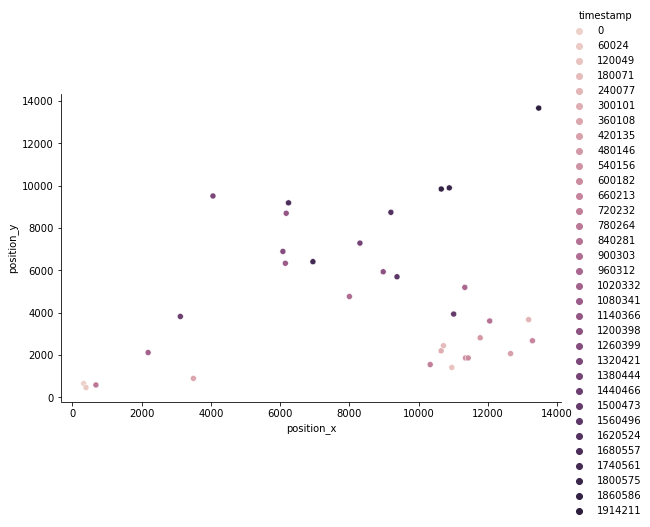

In [121]:
a = pd.DataFrame(df[['5','timestamp']])
a['position_x'] = a.apply(lambda x:x['5']['x'],axis=1)
a['position_y'] = a.apply(lambda x:x['5']['y'],axis=1)
sns.relplot(data=a, x='position_x', y='position_y', aspect=1.61,legend= 'full',hue = 'timestamp')


In [7]:
df = pd.read_json('timeline_tmp.json')
def damage_receive_aggreagate(series):
    dmgdict = {}
    for i in range(0,11):
        dmgdict[i] =0
    for i in  series['victimDamageReceived']:
        ID = i['participantId']
        dmg= i['physicalDamage']+i['trueDamage']+i['magicDamage']
        dmgdict[ID]+= dmg 
    return dmgdict
def kill_data(dff):
    eventsdf = pd.DataFrame.from_dict(dff['events'])
    if sum(eventsdf['type']=='CHAMPION_KILL')!=0:
        killevent =eventsdf[eventsdf['type']=='CHAMPION_KILL'][['timestamp','bounty','killStreakLength',
                                                                'killerId','victimId','position','shutdownBounty',
                                                                'victimDamageDealt','victimDamageReceived']]
        killevent['DRG_Summary'] = killevent.apply(damage_receive_aggreagate,axis=1)
        killevent['real_killer'] = killevent.apply(lambda x:max(x['DRG_Summary'], key=x['DRG_Summary'].get),axis=1)
        killevent['real_killer_dmg'] = killevent.apply(lambda x:x['DRG_Summary'][x['real_killer']],axis=1)
        killevent['position_x'] = killevent.apply(lambda x:x['position']['x'],axis=1)
        killevent['position_y'] = killevent.apply(lambda x:x['position']['y'],axis=1)
        return killevent[['timestamp','position_x','position_y','bounty','killerId','killerId','real_killer','real_killer_dmg']]
lists = []
for j in df.iloc[4]['info']:
    lists.append(kill_data(j))
pd.concat(lists)

,timestamp,position_x,position_y,bounty,killerId,killerId,real_killer,real_killer_dmg
30,163615,11378,3742,400.0,4.0,4.0,2,344
33,164639,11344,3936,300.0,10.0,10.0,9,282
40,169493,11611,4486,300.0,9.0,9.0,9,388
41,169526,11681,4232,300.0,4.0,4.0,4,390
52,176462,10714,2437,300.0,9.0,9.0,9,590
...,...,...,...,...,...,...,...,...
0,1862603,13231,9978,274.0,3.0,3.0,3,2445
1,1869145,14066,11253,274.0,1.0,1.0,3,1630
22,1888609,13986,12334,274.0,4.0,4.0,4,2017
23,1891218,13725,12846,274.0,1.0,1.0,1,1914


#  Real killer Dmg... Steady growing over time 

<AxesSubplot:xlabel='timestamp'>

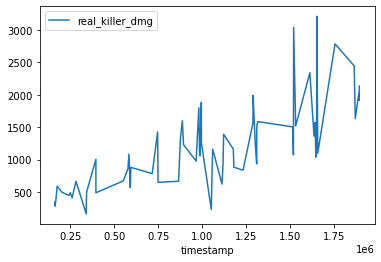

In [8]:
pd.concat(lists).plot(x = 'timestamp',y='real_killer_dmg')

In [48]:
import numpy 
import seaborn as sns

#  late kill happened at enemy's base.

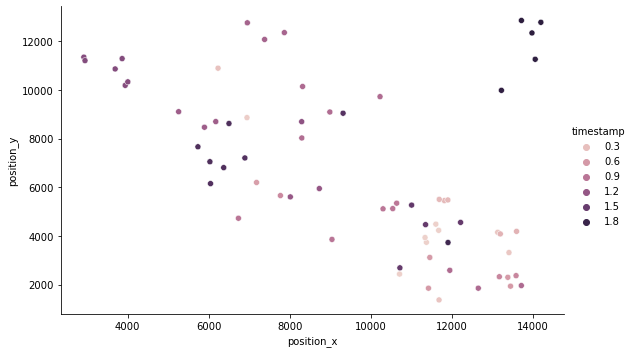

In [18]:
sns.relplot(data=pd.concat(lists), x='position_x', y='position_y', hue='timestamp', aspect=1.61)
plt.show()
## OK ... Early kill at bot, then ahve some jg fights....

# New Data Quick EDA

In [263]:
TestData = pd.read_pickle('F:////League of legends Game Prediction//LoL-PlaybyPlay-Win-Prediction//JWdata//building_kill.pkl')

<AxesSubplot:title={'center':'First_Tower_down_Time:Cumulative_Distribution'}, xlabel='timestamp'>

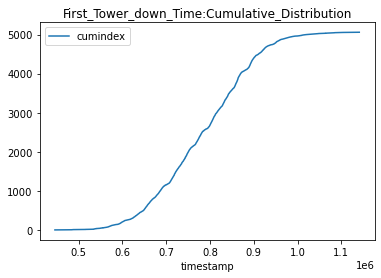

In [264]:
## Check First turrent timestamps..
First_Tower = TestData.sort_values('timestamp').groupby('matchId').first().sort_values('timestamp')
First_Tower['index'] =1
First_Tower['cumindex'] = First_Tower['index'].cumsum()
First_Tower.plot(x ='timestamp',y='cumindex',title = 'First_Tower_down_Time:Cumulative_Distribution')
## Distribution.

(array([  2.,   7.,   7.,  40.,  81., 121., 191., 333., 345., 392., 507.,
        423., 399., 487., 501., 363., 367., 193., 147.,  58.,  43.,  22.,
         18.,   6.,   5.]),
 array([ 445795.  ,  473605.72,  501416.44,  529227.16,  557037.88,
         584848.6 ,  612659.32,  640470.04,  668280.76,  696091.48,
         723902.2 ,  751712.92,  779523.64,  807334.36,  835145.08,
         862955.8 ,  890766.52,  918577.24,  946387.96,  974198.68,
        1002009.4 , 1029820.12, 1057630.84, 1085441.56, 1113252.28,
        1141063.  ]),
 <BarContainer object of 25 artists>)

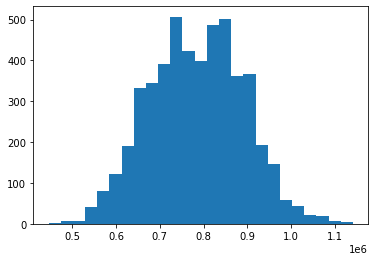

In [265]:
plt.hist(First_Tower['timestamp'],bins=25)

In [266]:
## Prety clear from the analysis that first tower normally happened at bot or mid. Top turrent will normally be down 
## less quicklY [ with lareger standard deviation as well.] That being said, bot player are likely switching to mid lane/ top lane 
## After they got first turrent. INNER_TURRENT of bot becomes less of a focus, and thus higher mean.

print(Group_item['timestamp'].mean())
print(Group_item['timestamp'].std())

laneType  towerType   
BOT_LANE  BASE_TURRET     1.538014e+06
          INNER_TURRET    1.356775e+06
          OUTER_TURRET    9.973298e+05
MID_LANE  BASE_TURRET     1.522700e+06
          INNER_TURRET    1.336413e+06
          NEXUS_TURRET    1.681473e+06
          OUTER_TURRET    1.054587e+06
TOP_LANE  BASE_TURRET     1.527943e+06
          INNER_TURRET    1.331396e+06
          OUTER_TURRET    1.015810e+06
Name: timestamp, dtype: float64
laneType  towerType   
BOT_LANE  BASE_TURRET     282496.895890
          INNER_TURRET    281158.099541
          OUTER_TURRET    234564.133102
MID_LANE  BASE_TURRET     302569.444007
          INNER_TURRET    291505.103528
          NEXUS_TURRET    313040.510868
          OUTER_TURRET    237779.383194
TOP_LANE  BASE_TURRET     303215.484870
          INNER_TURRET    310701.336825
          OUTER_TURRET    249946.715487
Name: timestamp, dtype: float64


laneType  towerType   
BOT_LANE  BASE_TURRET     AxesSubplot(0.125,0.125;0.775x0.755)
          INNER_TURRET    AxesSubplot(0.125,0.125;0.775x0.755)
          OUTER_TURRET    AxesSubplot(0.125,0.125;0.775x0.755)
MID_LANE  BASE_TURRET     AxesSubplot(0.125,0.125;0.775x0.755)
          INNER_TURRET    AxesSubplot(0.125,0.125;0.775x0.755)
          NEXUS_TURRET    AxesSubplot(0.125,0.125;0.775x0.755)
          OUTER_TURRET    AxesSubplot(0.125,0.125;0.775x0.755)
TOP_LANE  BASE_TURRET     AxesSubplot(0.125,0.125;0.775x0.755)
          INNER_TURRET    AxesSubplot(0.125,0.125;0.775x0.755)
          OUTER_TURRET    AxesSubplot(0.125,0.125;0.775x0.755)
Name: timestamp, dtype: object

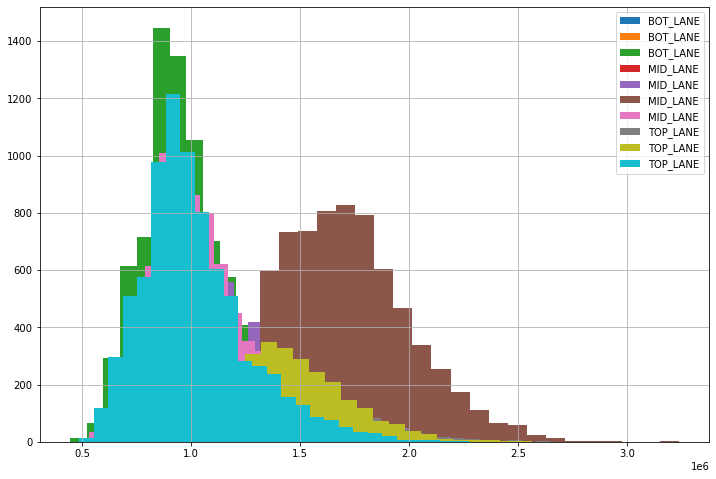

In [267]:
## Tower Gone Time... By average - TELL THE SAME STORY., IN a more visualized way.
Group_item = TestData.groupby(['laneType','towerType'])
Group_item['timestamp'].hist(legend= True,bins=30,figsize = (12,8))

In [268]:
## First Turrent down time at mid/bot/top lane might be a good indicator

<AxesSubplot:>

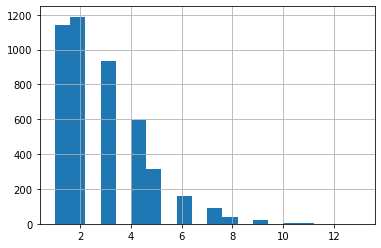

In [269]:
## What could ward kill information tell us ? 
## - It might tell us aggregate information of evaluating a player's skill
## - Average # of ward kill by a specific player per minutes, Mid/Top/Bot, Yellow_trinket only. [ Anti-gank ability].
## - Ward kill frequnecy in mid game
TestData = pd.read_pickle('F:////League of legends Game Prediction//LoL-PlaybyPlay-Win-Prediction//JWdata//ward_kill.pkl')
## Check Support player for example
SupData = TestData[((TestData['killerId']== 5)|(TestData['killerId']== 10))&(TestData['wardType']=='YELLOW_TRINKET')]
SupData['index'] =1
SupData.groupby('matchId')['index'].sum().hist(bins =20)
## OK. Good # of ward kill might be a good indicator for winning

In [270]:
## So this for this whole game the support player are only able to kill 2 ward? hmm
SupData[SupData['matchId']=='NA1_4583937113']

,matchId,sampleTimestamp,type,killerId,timestamp,wardType,index
0,NA1_4583937113,360000,WARD_KILL,5,304672,YELLOW_TRINKET,1
10,NA1_4583937113,840000,WARD_KILL,5,819288,YELLOW_TRINKET,1
19,NA1_4583937113,1020000,WARD_KILL,10,1004274,YELLOW_TRINKET,1
29,NA1_4583937113,1200000,WARD_KILL,10,1168703,YELLOW_TRINKET,1


In [271]:
TestData = pd.read_pickle('F:////League of legends Game Prediction//LoL-PlaybyPlay-Win-Prediction//JWdata//turret_plate_destroyed.pkl')

(array([   2.,    4.,    5.,   22.,  120.,  197.,  323.,  597.,  531.,
         424.,  748.,  716.,  684., 1010., 1245., 1217., 1091., 1598.,
        1408., 1223., 1860., 1891., 1815., 1789., 1816.]),
 array([190277.  , 216268.44, 242259.88, 268251.32, 294242.76, 320234.2 ,
        346225.64, 372217.08, 398208.52, 424199.96, 450191.4 , 476182.84,
        502174.28, 528165.72, 554157.16, 580148.6 , 606140.04, 632131.48,
        658122.92, 684114.36, 710105.8 , 736097.24, 762088.68, 788080.12,
        814071.56, 840063.  ]),
 <BarContainer object of 25 artists>)

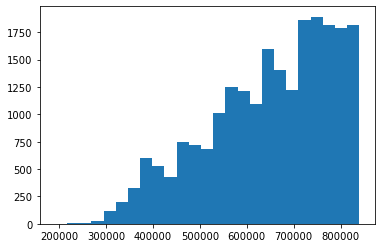

In [272]:
## Turrent_Plate_dstroyed might also be a great indicator ( global indicator for evaluating aggressiveness of a player/ win rate prediction)
## For example, let's check TOP_LANE Turrent_Plate Destoryed Process.

## If killerId =2 or 7, that basically just means jg helped the player.
plt.hist(TestData[(TestData['laneType']=='TOP_LANE')]['timestamp'],bins=25)
## hmm interseting 

In [273]:
set(TestData['laneType'])

{'BOT_LANE', 'MID_LANE', 'TOP_LANE'}

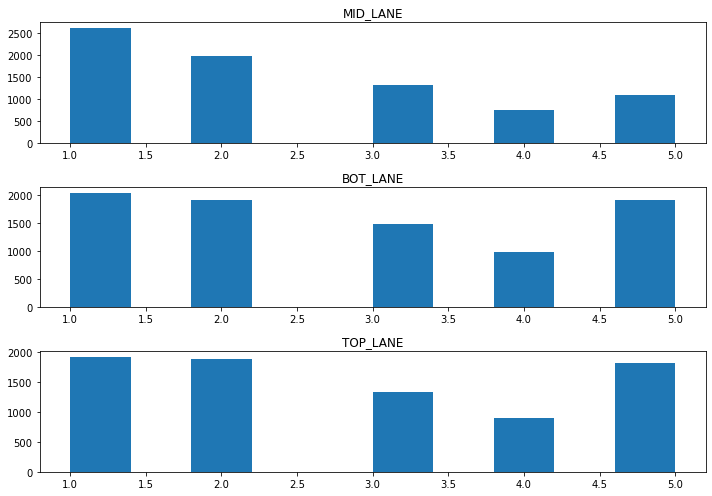

In [274]:
fig, axs = plt.subplots(3,figsize= (10,7))
for a,i in enumerate(['MID_LANE','BOT_LANE','TOP_LANE']):
    df = TestData[(TestData['laneType']==i)]
    df['accumulator'] =1 
    axs[a].hist(df.groupby(['matchId','teamId']).sum()['accumulator'])
    axs[a].set_title(i)
fig.tight_layout()
## Looks like for each game ,almost surely some mid/bot/top will get first plate bounty for sure. But it seems like 
## Mid laner are less likely to gather last few bounty ( especially 4 vs 5)

In [3]:
TestData = pd.read_pickle('F:////League of legends Game Prediction//LoL-PlaybyPlay-Win-Prediction//JWdata//champion_kill.pkl')

In [4]:
def damage_receive_aggreagate(series):
    dmgdict = {}
    for i in range(0,11):
        dmgdict[i] =0
    for i in  series['victimDamageReceived']:
        ID = i['participantId']
        dmg= i['physicalDamage']+i['trueDamage']+i['magicDamage']
        dmgdict[ID]+= dmg 
    return dmgdict
killevent =TestData[['matchId','timestamp','bounty','killStreakLength',
                     'killerId','victimId','position','shutdownBounty',
                     'victimDamageDealt','victimDamageReceived']]
killevent['DRG_Summary'] = killevent.apply(damage_receive_aggreagate,axis=1)
killevent['real_killer'] = killevent.apply(lambda x:max(x['DRG_Summary'], key=x['DRG_Summary'].get),axis=1)
killevent['real_killer_dmg'] = killevent.apply(lambda x:x['DRG_Summary'][x['real_killer']],axis=1)
killevent['position_x'] = killevent.apply(lambda x:x['position']['x'],axis=1)
killevent['position_y'] = killevent.apply(lambda x:x['position']['y'],axis=1)

In [5]:
killevent

,matchId,timestamp,bounty,killStreakLength,killerId,victimId,position,shutdownBounty,victimDamageDealt,victimDamageReceived,DRG_Summary,real_killer,real_killer_dmg,position_x,position_y
0,NA1_4571700523,170537,400,0,7,5,"{'x': 11283, 'y': 1014}",0,"[{'basic': True, 'magicDamage': 0, 'name': 'As...","[{'basic': True, 'magicDamage': 0, 'name': 'Va...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...",7,369,11283,1014
1,NA1_4571700523,175262,300,0,9,4,"{'x': 10762, 'y': 1647}",0,"[{'basic': True, 'magicDamage': 0, 'name': 'Si...","[{'basic': False, 'magicDamage': 84, 'name': '...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...",9,478,10762,1647
2,NA1_4571700523,175988,300,0,4,10,"{'x': 11474, 'y': 1454}",0,"[{'basic': False, 'magicDamage': 0, 'name': 'N...","[{'basic': True, 'magicDamage': 0, 'name': 'Si...","{0: 17, 1: 0, 2: 89, 3: 0, 4: 206, 5: 228, 6: ...",5,228,11474,1454
3,NA1_4571700523,177308,300,1,7,2,"{'x': 11520, 'y': 1726}",0,"[{'basic': False, 'magicDamage': 0, 'name': 'Z...","[{'basic': False, 'magicDamage': 82, 'name': '...","{0: 8, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...",7,276,11520,1726
4,NA1_4571700523,207084,300,0,8,3,"{'x': 6315, 'y': 6669}",0,"[{'basic': False, 'magicDamage': 124, 'name': ...","[{'basic': False, 'magicDamage': 72, 'name': '...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...",8,346,6315,6669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,NA1_4583937113,1638904,300,0,4,7,"{'x': 6001, 'y': 1301}",0,"[{'basic': True, 'magicDamage': 0, 'name': 'SR...","[{'basic': True, 'magicDamage': 0, 'name': 'Ya...","{0: 0, 1: 0, 2: 1314, 3: 1159, 4: 766, 5: 0, 6...",2,1314,6001,1301
34,NA1_4583937113,1643299,300,5,9,3,"{'x': 7386, 'y': 1629}",0,"[{'basic': False, 'magicDamage': 243, 'name': ...","[{'basic': False, 'magicDamage': 0, 'name': 'Z...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...",9,2375,7386,1629
35,NA1_4583937113,1651095,300,4,8,2,"{'x': 5815, 'y': 1671}",0,"[{'basic': False, 'magicDamage': 6, 'name': 'E...","[{'basic': True, 'magicDamage': 0, 'name': 'SR...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...",10,220,5815,1671
36,NA1_4583937113,1654266,175,5,8,5,"{'x': 4595, 'y': 1488}",0,"[{'basic': False, 'magicDamage': 31, 'name': '...","[{'basic': True, 'magicDamage': 0, 'name': 'Ja...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1648, ...",6,1648,4595,1488


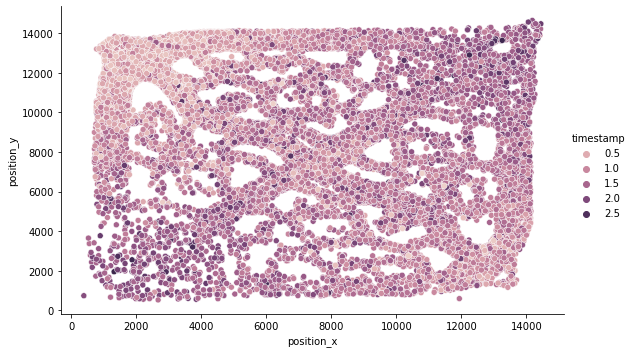

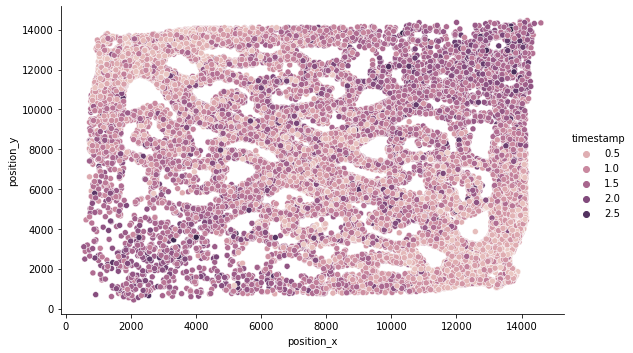

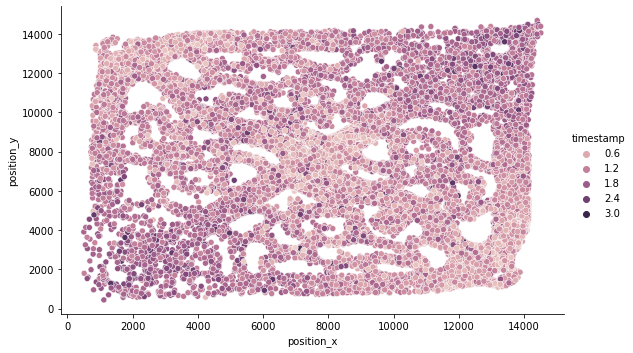

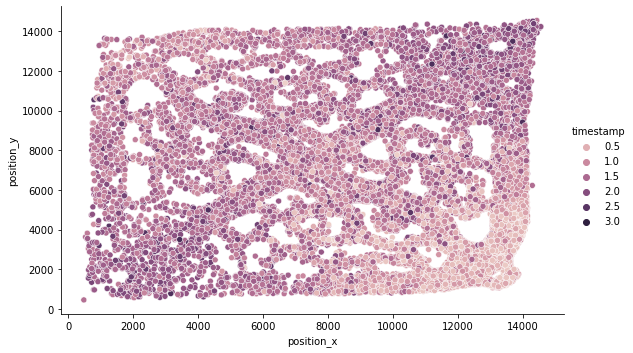

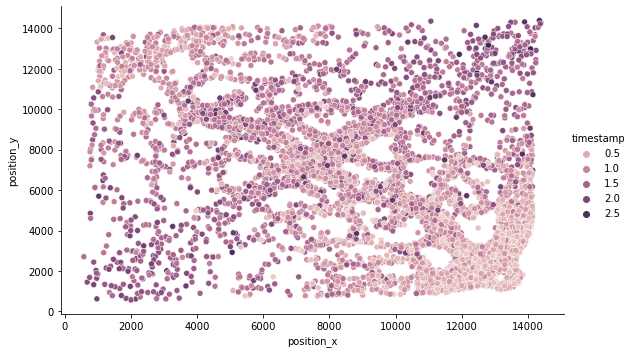

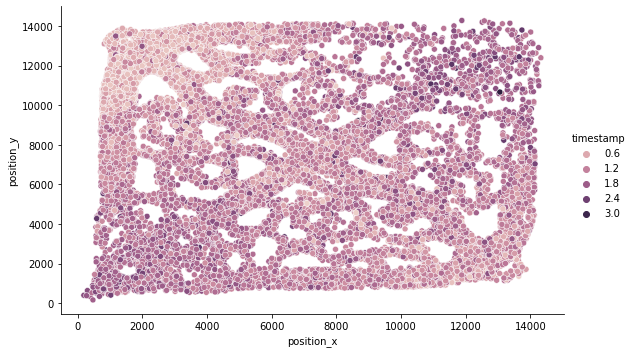

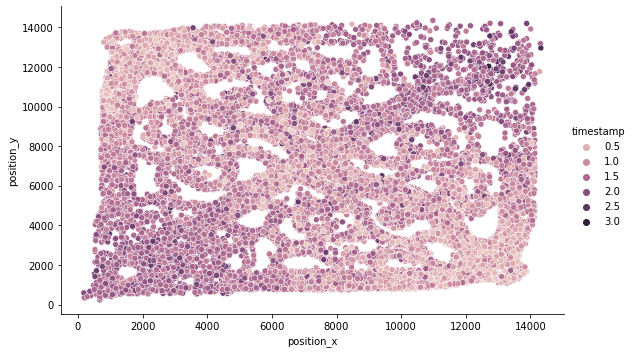

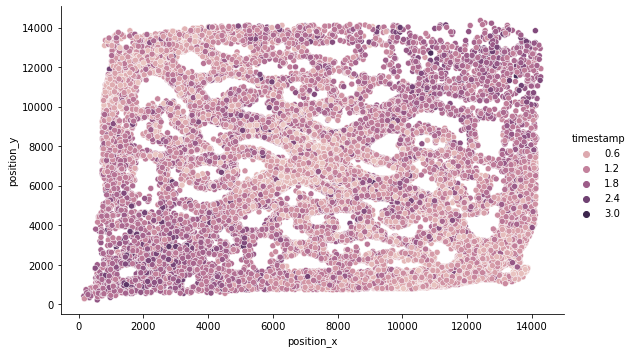

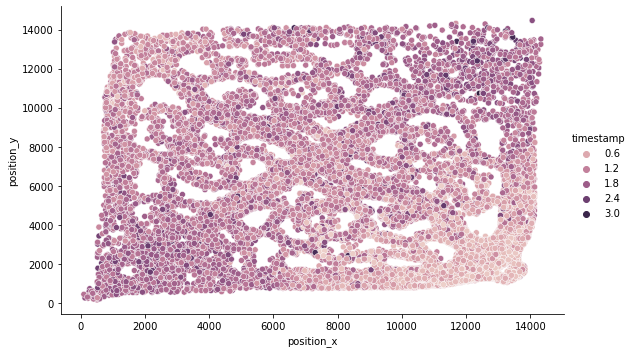

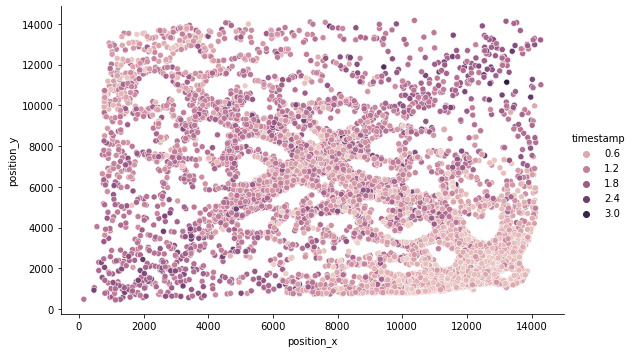

In [27]:
for i in range(1,11):
    sns.relplot(data=killevent[killevent['real_killer']==i], x='position_x', y='position_y',  hue = 'timestamp',aspect=1.61)
## Looks like for each game ,almost surely some mid/bot/top will get first plate bounty for sure. But it seems like 
## Mid laner are less likely to gather last few bounty ( especially 4 vs 5)

In [30]:
TestData = pd.read_pickle('F:////League of legends Game Prediction//LoL-PlaybyPlay-Win-Prediction//JWdata//ward_placed.pkl')

In [31]:
TestData

,matchId,sampleTimestamp,type,creatorId,timestamp,wardType
0,NA1_4571700523,60000,WARD_PLACED,5,45873,YELLOW_TRINKET
1,NA1_4571700523,60000,WARD_PLACED,3,46104,YELLOW_TRINKET
2,NA1_4571700523,60000,WARD_PLACED,2,51457,YELLOW_TRINKET
3,NA1_4571700523,180000,WARD_PLACED,4,126596,YELLOW_TRINKET
4,NA1_4571700523,180000,WARD_PLACED,8,146352,YELLOW_TRINKET
...,...,...,...,...,...,...
118,NA1_4592368445,1250000,WARD_PLACED,4,1225760,TEEMO_MUSHROOM
119,NA1_4592368445,1250000,WARD_PLACED,2,1229591,CONTROL_WARD
120,NA1_4592368445,1250000,WARD_PLACED,5,1239238,SIGHT_WARD
121,NA1_4592368445,1250000,WARD_PLACED,4,1239304,TEEMO_MUSHROOM
